In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt

import scipy.signal as scisig

from scipy.signal import butter, filtfilt

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='lowpass')
    return b, a


def butter_lowpass_filter(data, highcut, fs, order=5):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def butter_highpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, low, btype='highpass')
    return b, a


def butter_highpass_filter(data, lowcut, fs, order=5):
    b, a = butter_highpass(lowcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


def R2_func(f, y, A):
    return A/y/((f*2*np.pi)**2 + y**2)

In [94]:
base = 'D:/Tom/Monitoring/240322/tt ('
files = np.linspace(290, 300, 11)
end = ').mat'

In [95]:
PSD_R2z_avr = np.zeros(10000)
PSD_R2y_avr = np.zeros(10000)

for i in files:
    filename = base + str(int(i)) + end
    data = sio.loadmat(filename)
    z = np.transpose(data['C'])[0]
    z_lowpass = butter_lowpass_filter(z, 100000, fs = 10**6, order = 5)
    z_bandpass = butter_highpass_filter(z_lowpass, 30000, fs = 10**6, order = 5)
    R2z = z_bandpass**2
    R2z_filt = butter_lowpass_filter(R2z, 100, fs = 10**6, order = 3)
    PSD_R2z = scisig.welch(R2z_filt, fs = 10**6, nperseg = 20*10**6)
    PSD_R2z_avr += PSD_R2z[1][:10000]
    
    
    y = np.transpose(data['A'])[0]
    y_lowpass = butter_lowpass_filter(y, 400000, fs = 10**6, order = 5)
    y_bandpass = butter_highpass_filter(y_lowpass, 320000, fs = 10**6, order = 5)
    R2y = y_bandpass**2
    R2y_filt = butter_lowpass_filter(R2y, 100, fs = 10**6, order = 3)
    PSD_R2y = scisig.welch(R2y_filt, fs = 10**6, nperseg = 20*10**6)
    PSD_R2y_avr += PSD_R2y[1][:10000]
    
PSD_R2z_avr /= len(files)
PSD_R2y_avr /= len(files)

In [96]:
fitz, covz = opt.curve_fit(R2_func, PSD_R2z[0][:800], PSD_R2z_avr[:800])
fittedz = R2_func(PSD_R2z[0][:1000], *fitz)
print(fitz)

fity, covy = opt.curve_fit(R2_func, PSD_R2y[0][:100], PSD_R2y_avr[:100])
fittedy = R2_func(PSD_R2y[0][:1000], *fity)
print(fity)

[2.12729602e+00 6.46535844e-12]
[1.78848014e+00 6.21360559e-13]


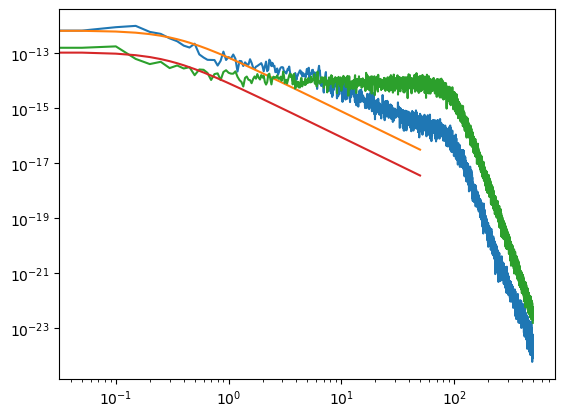

In [97]:
lb = 0
ub = 1000*10
plt.plot(PSD_R2z[0][lb:ub], PSD_R2z_avr)
plt.plot(PSD_R2z[0][:1000], fittedz)

plt.plot(PSD_R2y[0][lb:ub], PSD_R2y_avr)
plt.plot(PSD_R2y[0][:1000], fittedy)
plt.yscale('log')
plt.xscale('log')

In [92]:
y_lowpass = butter_lowpass_filter(y, 400000, fs = 10**6, order = 5)
y_bandpass = butter_highpass_filter(y_lowpass, 320000, fs = 10**6, order = 5)
PSD = scisig.welch(y_bandpass, fs = 10**6, nperseg = 10**5)

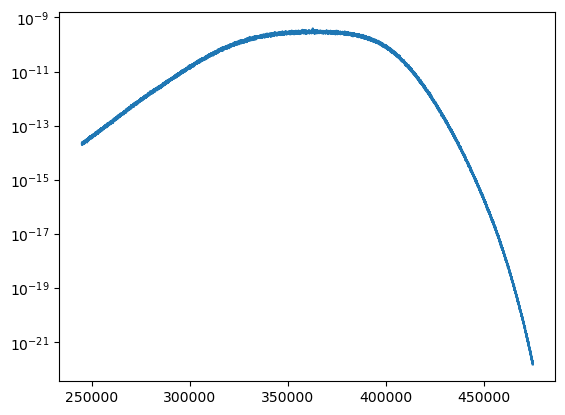

In [93]:
lb = 24500
ub = 47500
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub])
plt.yscale('log')